In [1]:
# Step 1: Importing Libraries and Reading the Data
# Question 1.1: Import the necessary libraries for data manipulation and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Question 1.2: Load the dataset from the train.csv file into a pandas DataFrame and display:
# first five rows.
# last 5 rows
# summary
# info
# datatype

data = pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Question 2.1: Check for missing values % in the dataset.

data.isnull().sum()*100/len(data)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [4]:
# Question 2.2: For the columns with missing values, fill the missing values with an appropriate strategy. 
# Here, fill numerical columns with the mean of the column, and categorical columns with the mode.
# Also drop columns having missing values > 50%

numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

# Fill missing values
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<AxesSubplot:xlabel='Purchase'>

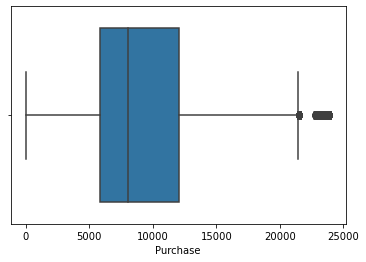

In [5]:
# Question 3.1: Check for outliers in the 'Purchase' column using a boxplot.
sns.boxplot(x=data['Purchase'])

<AxesSubplot:xlabel='Purchase'>

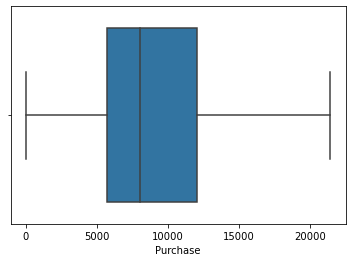

In [6]:
# Question 3.2: Remove outliers in the 'Purchase' based on upper fence and lower fence
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower fences
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

# Filter the data to remove the outliers
data = data[(data['Purchase'] >= lower_fence) & (data['Purchase'] <= upper_fence)]

# Q : plot boxplot after removing outlier
sns.boxplot(x=data['Purchase'])

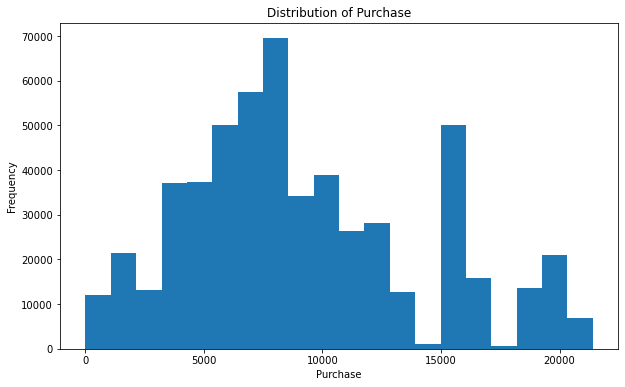

In [7]:
# Question 4.1: Plot a histogram of the 'Purchase' column to visualize its distribution. 
plt.figure(figsize=(10,6))
plt.hist(data['Purchase'], bins=20)
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase')
plt.show()

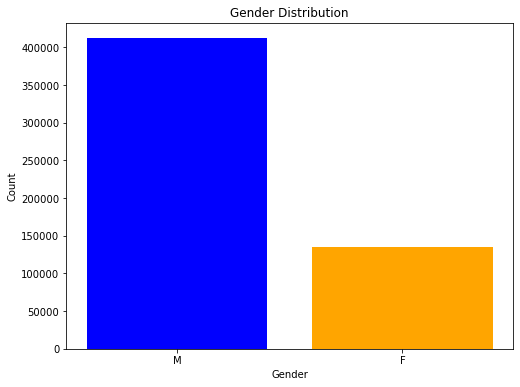

In [8]:
# Question 4.2: Create a bar plot to show the count of each category in the 'Gender' column.
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

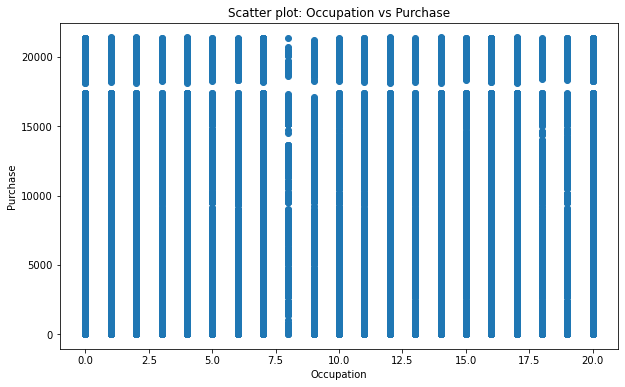

In [9]:
# Question 4.3: Using matplotlib, create a scatter plot between 'Occupation' and 'Purchase' to 
# visualize any possible relationships.
plt.figure(figsize=(10,6))
plt.scatter(data['Occupation'], data['Purchase'])
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Scatter plot: Occupation vs Purchase')
plt.show()

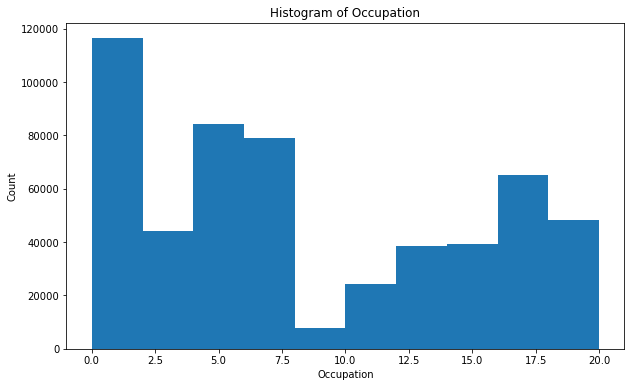

In [10]:
# Question 4.4: Using matplotlib, create a histogram of the 'Occupation' column to 
# visualize the distribution of different occupations.

plt.figure(figsize=(10,6))
plt.hist(data['Occupation'], bins=10)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

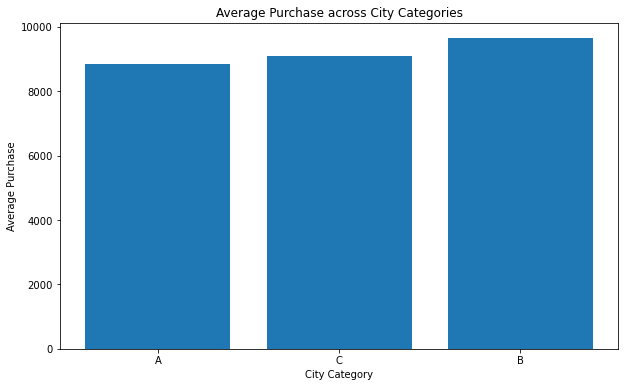

In [11]:
# Question 4.5: Using matplotlib, 
# create a bar chart to compare the average 'Purchase' across different 'City_Category'.

plt.figure(figsize=(10,6))
city_categories = data['City_Category'].unique()
average_purchases = data.groupby('City_Category')['Purchase'].mean()
plt.bar(city_categories, average_purchases)
plt.xlabel('City Category')
plt.ylabel('Average Purchase')
plt.title('Average Purchase across City Categories')
plt.show()


In [ ]:
# Find correlation, use heatmap, show annotations
# Compute the correlation matrix
corr = data.corr()

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')